In [138]:
import pandas as pd
import numpy as np

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
#import neattext.function as nfx


In [140]:
df = pd.read_csv("emotion_dataset.csv")

In [141]:
df.head()


,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [142]:
df.shape

(34792, 4)

In [143]:
df.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [144]:
# check missing values
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [145]:
# calue Count EMotion
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

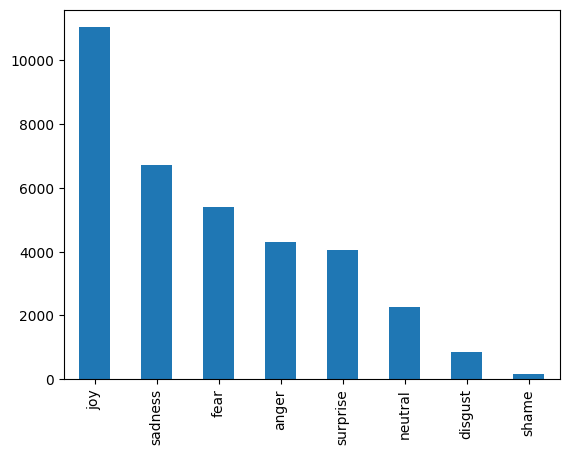

In [146]:
# calue Count EMotion
df['Emotion'].value_counts().plot(kind='bar')

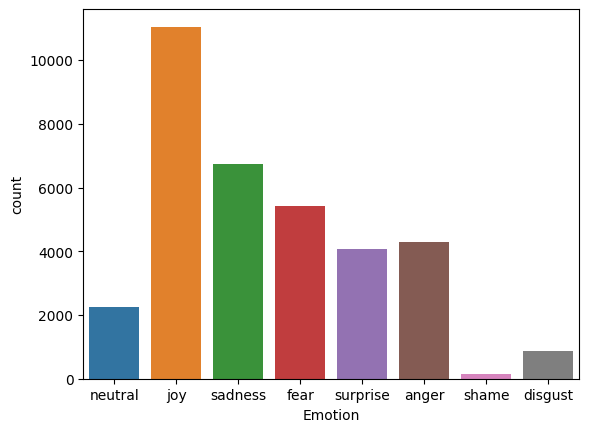

In [147]:
#using Seaborn to PLot 
sns.countplot(data=df, x='Emotion')

# Show the plot
plt.show()

### Exploring
+ Text Cleaning
+ Sentimental Analysis
+ keyword Extraction
    - keyword for each emotion
    - wordcloud


In [148]:
# sentimental analysis
from textblob import TextBlob

In [149]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [150]:
get_sentiment("I love code")

'Positive'

In [151]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [152]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


In [153]:
# Compare our Emotion vs Sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

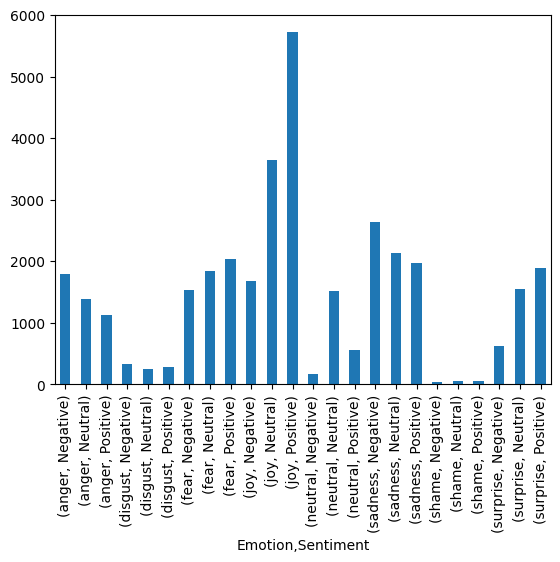

In [154]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

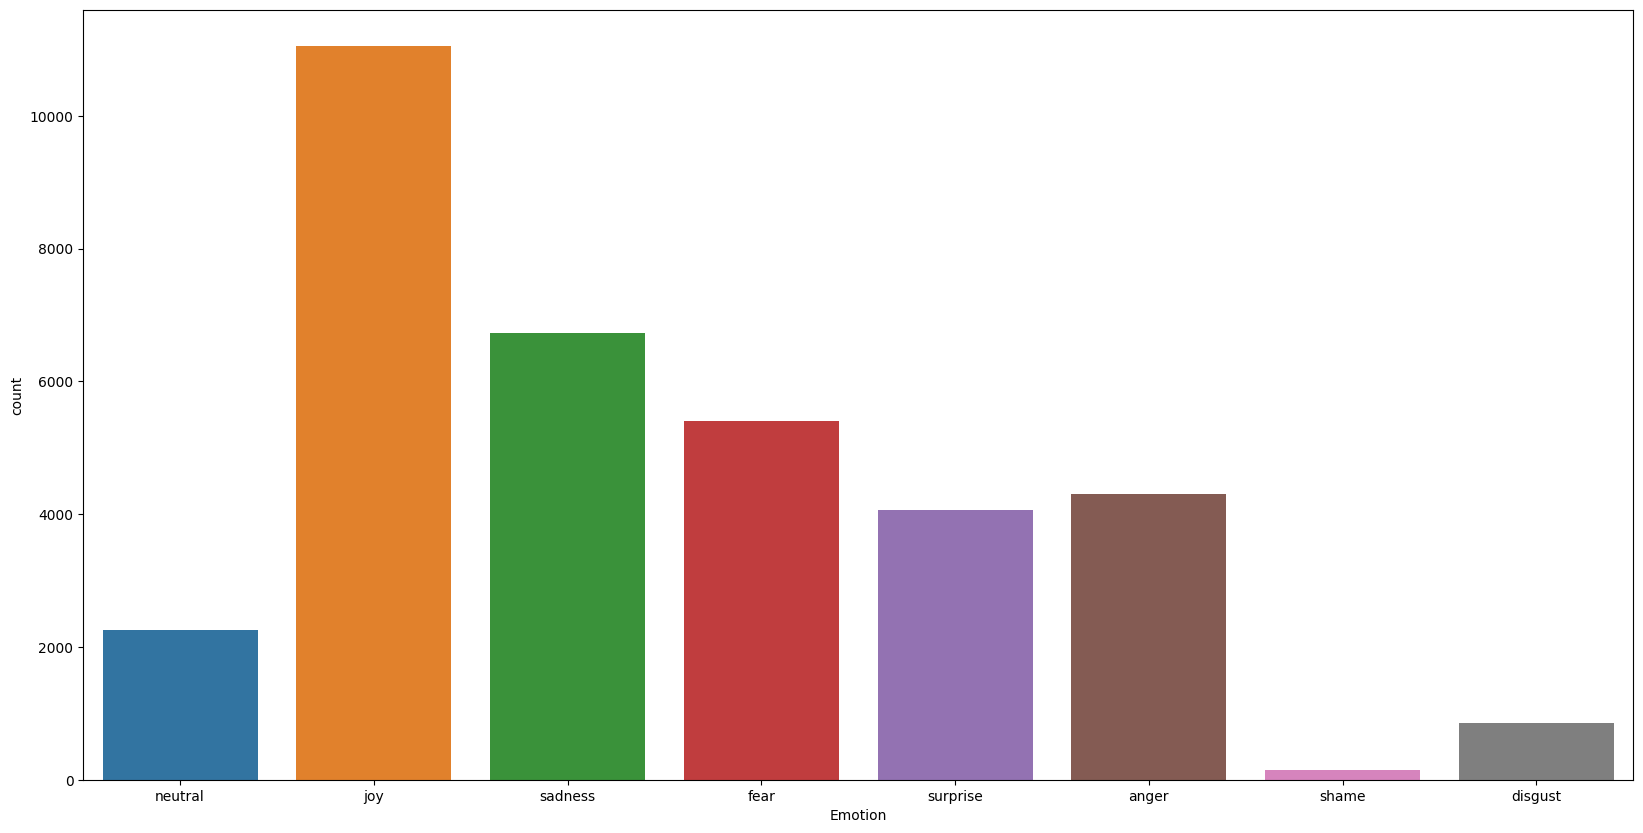

In [155]:
#New Method
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

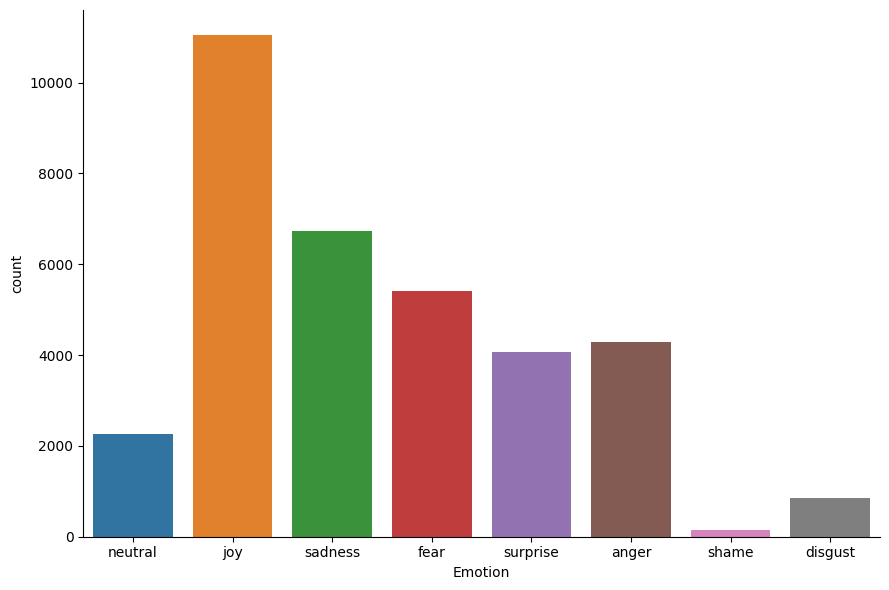

In [156]:
#Using Seaborn
sns.catplot(x="Emotion", data=df, kind="count", height=6, aspect=1.5)

# Show the plot
plt.show()

## Text Cleaning
+ Remove noise
    - stopwords
    - special characters
    - punctuations
    - emoji

In [157]:
import neattext as nfx
dir(nfx)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols'

In [158]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [159]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [160]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [161]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


### Keyword Extracting
+ Extract most comonest words per class of emotion

In [162]:
from collections import Counter

In [163]:
def extract_keywords(text, num):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)


In [164]:
# list of emotion
emotion_list = df["Emotion"].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [165]:
df[df['Emotion'] == 'joy']

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral
12,12,joy,"For once in his life , Leopold must have been ...",life Leopold truly happy : hopes prayers belo...,Positive
17,17,joy,I have a feeling i will fail french #fuckfrench,feeling fail french #fuckfrench,Negative
...,...,...,...,...,...
34778,34778,joy,"In other news, my mum made EFO.",news mum EFO,Negative
34784,34784,joy,~ As musicas que nois danço com os munitores t...,~ musicas que nois danço com os munitores todo...,Positive
34785,34785,joy,When I understood that I was admitted to the U...,understood admitted University,Neutral
34786,34786,joy,Tuesday woken up to Oscar and Cornet practice X,Tuesday woken Oscar Cornet practice X,Neutral


In [166]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()
joy_list

['Sage Act upgrade list tommorow',
 'eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness ',
 '  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang',
 'life  Leopold truly happy : hopes prayers beloved son come fruition ',
 'feeling fail french #fuckfrench',
 'GoodLet  ',
 'fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile',
 'terribly ecstatic dangerous thing ',
 'selected study university',
 'Yeah  ’ ages  ',
 'passed BA exams class results',
 'heard selected fot year university Zambia form Chikola secondary school',
 'Welp time study days',
 'Heading campus rain grad photos',
 'feeling awesome ',
 '  brings  Ive bought Christmas presents trawl loads shops :)',
 'shit pants Pure 100% gravy',
 'life  Leopold

In [167]:
# joy Document
joy_docx = ''.join(joy_list)
joy_docx

'Sage Act upgrade list tommoroweye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness   ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko anglife  Leopold truly happy : hopes prayers beloved son come fruition feeling fail french #fuckfrenchGoodLet  fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhileterribly ecstatic dangerous thing selected study universityYeah  ’ ages  passed BA exams class resultsheard selected fot year university Zambia form Chikola secondary schoolWelp time study daysHeading campus rain grad photosfeeling awesome   brings  Ive bought Christmas presents trawl loads shops :)shit pants Pure 100% gravylife  Leopold truly happy : hopes prayers beloved son come fruition Class jamming paper quarter rea

In [168]:
# Extract Keyword
keyword_joy = extract_keywords(joy_docx,50)
keyword_joy

{'amp': 652,
 'day': 582,
 'time': 468,
 'Im': 453,
 'like': 439,
 'work': 400,
 'Christmas': 370,
 'today': 318,
 'good': 312,
 'tomorrow': 304,
 'happy': 303,
 'love': 283,
 'going': 283,
 'night': 250,
 'got': 248,
 'home': 248,
 'school': 233,
 '2': 232,
 'morning': 225,
 'joy': 214,
 'life': 208,
 'hours': 201,
 'feel': 193,
 'year': 183,
 'people': 179,
 'long': 178,
 's': 176,
 'new': 172,
 'great': 168,
 'days': 166,
 'week': 163,
 'sleep': 158,
 'know': 158,
 'family': 157,
 'RT': 156,
 'hour': 152,
 'God': 143,
 ':)': 143,
 'cant': 137,
 'excited': 135,
 'tonight': 134,
 'friends': 128,
 'feeling': 126,
 'felt': 126,
 'friend': 126,
 'right': 124,
 '3': 123,
 'old': 121,
 'me': 121,
 'think': 119}

In [169]:
# joy plot
def plot_most_common_words(mydict, emotion_name):
    df_01 = pd.DataFrame(mydict.items(), columns=['token', 'count'])  # Corrected 'columns' typo
    plt.figure(figsize=(20, 10))  # Use 'figsize' as a keyword argument (tuple)
    plt.title("Plot of {}".format(emotion_name))  # Corrected parentheses
    sns.barplot(x='token', y='count', data=df_01)
    plt.xticks(rotation=45)
    plt.show()

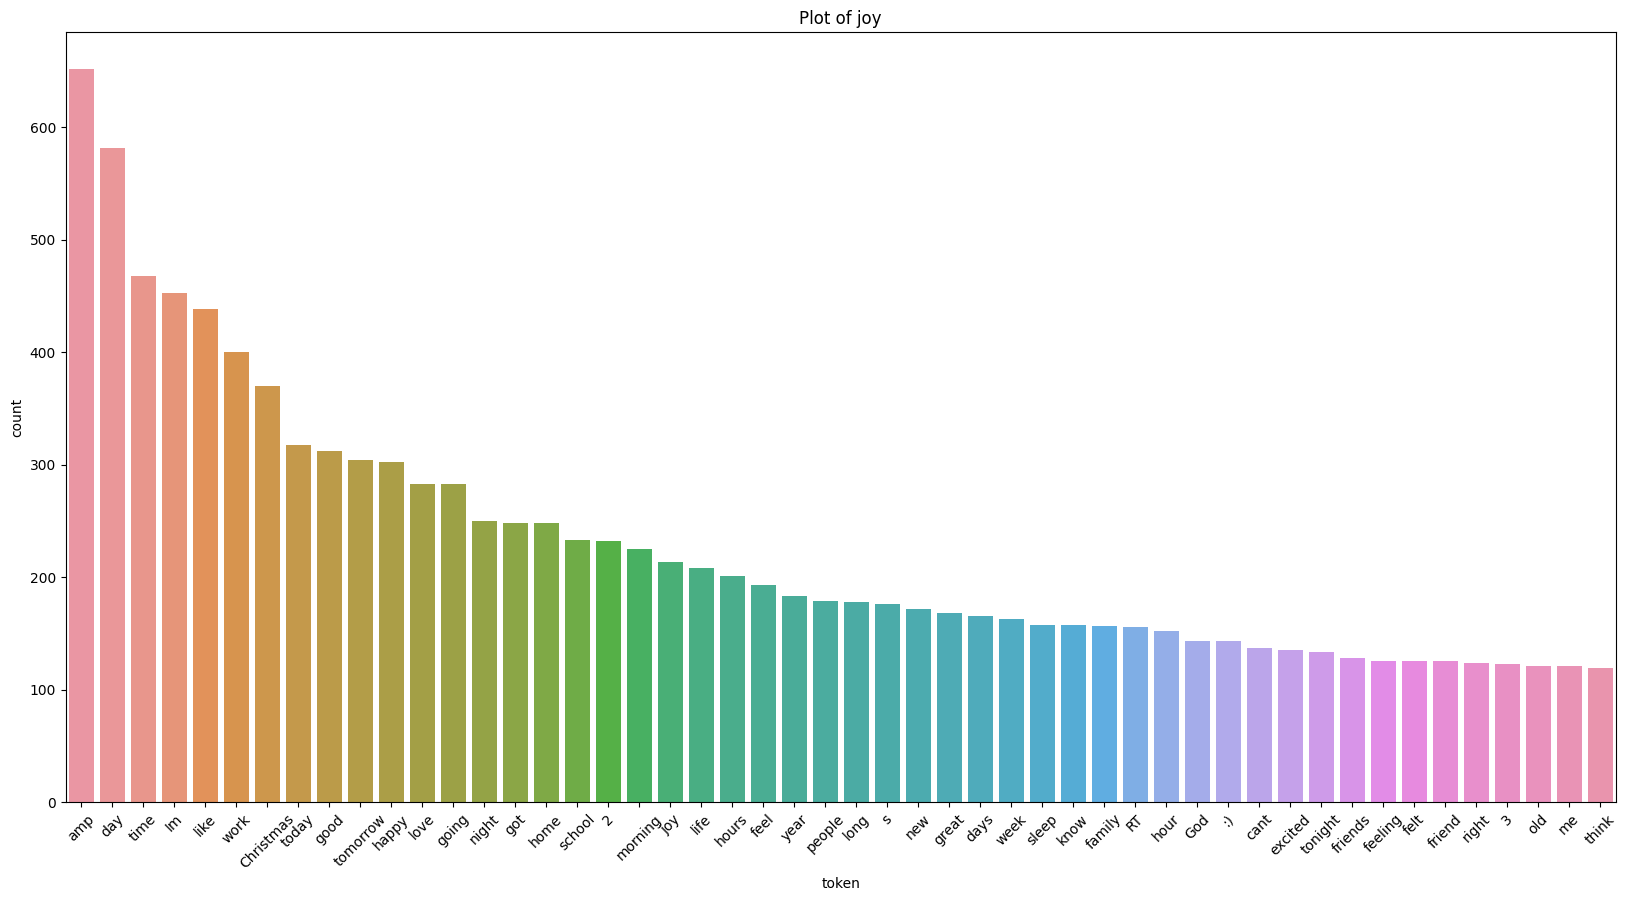

In [170]:
plot_most_common_words(keyword_joy,"joy")

In [171]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
surprise_list

surprise_doc = ''.join(surprise_list)
surprise_doc

keyword_surprise = extract_keywords(surprise_doc,50)
keyword_surprise

{'en': 294,
 'een': 290,
 'de': 246,
 'Im': 194,
 'van': 151,
 'know': 150,
 'home': 140,
 'ik': 134,
 'amp': 122,
 'met': 121,
 'nog': 120,
 'voor': 116,
 'day': 115,
 ':)': 113,
 'je': 109,
 'today': 109,
 'going': 106,
 'like': 103,
 'time': 102,
 'got': 102,
 'surprise': 98,
 'het': 95,
 'birthday': 92,
 'RT': 92,
 'wait': 88,
 'dan': 87,
 'actually': 86,
 'tomorrow': 85,
 'coming': 82,
 'love': 80,
 'u': 80,
 'good': 80,
 'night': 78,
 'friends': 76,
 'op': 73,
 'Christmas': 73,
 'la': 73,
 'new': 69,
 '5': 69,
 'special': 67,
 '2': 67,
 'think': 65,
 'away': 65,
 'best': 63,
 'mom': 63,
 'te': 61,
 'work': 60,
 'wel': 59,
 'die': 57,
 'dat': 56}

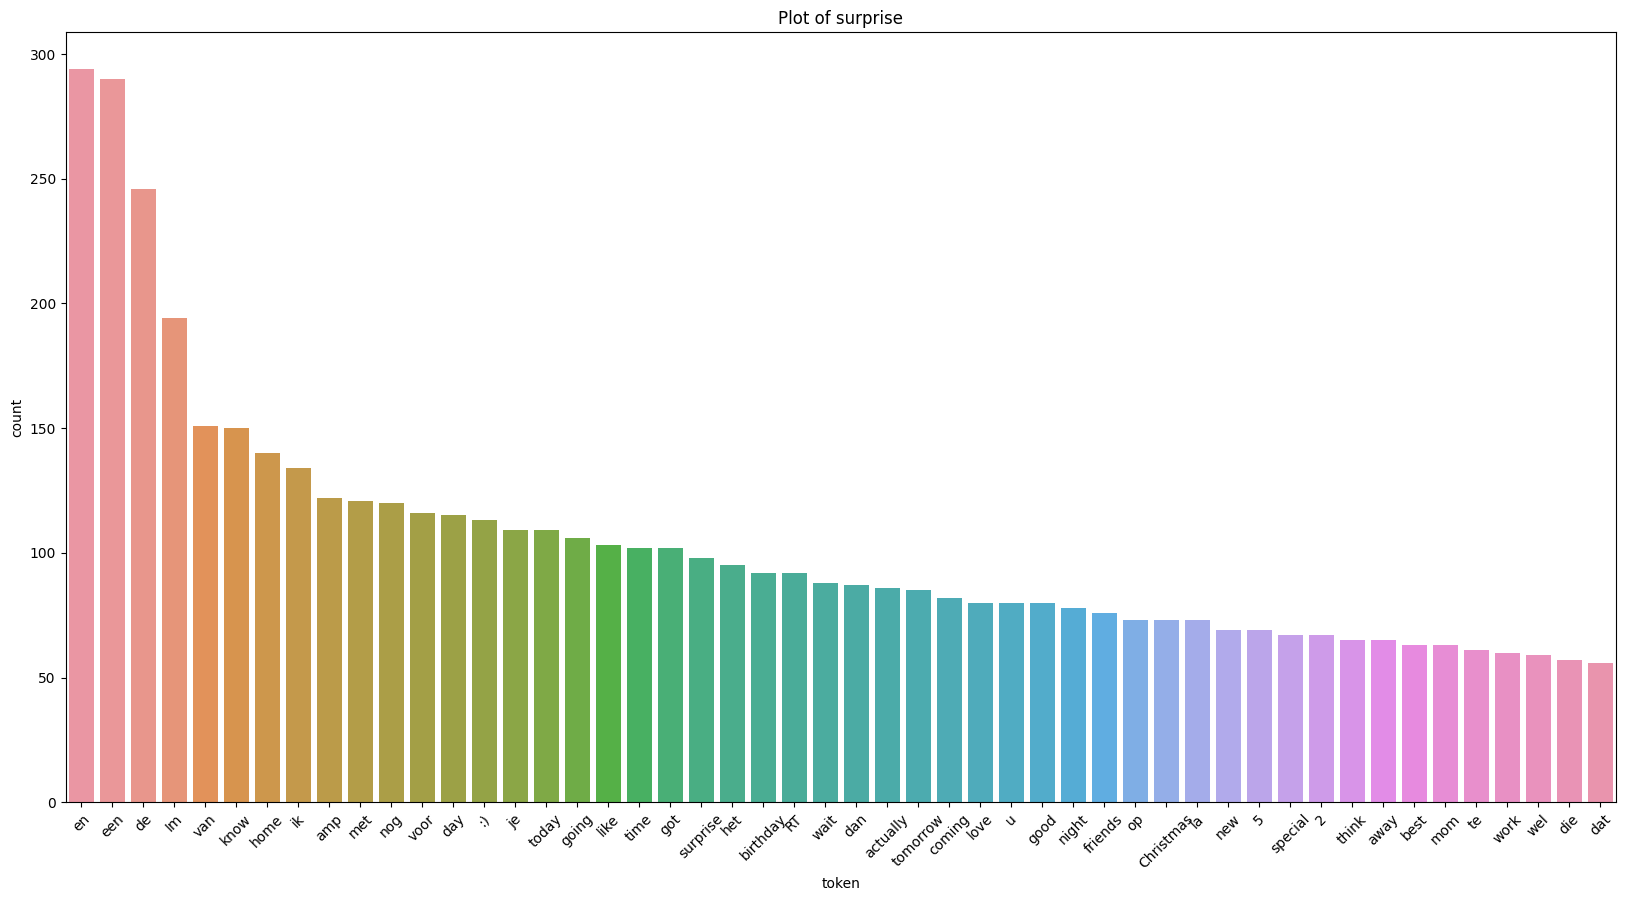

In [172]:
plot_most_common_words(keyword_surprise,"surprise")

In [173]:
from wordcloud import WordCloud

In [174]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20, 10))
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


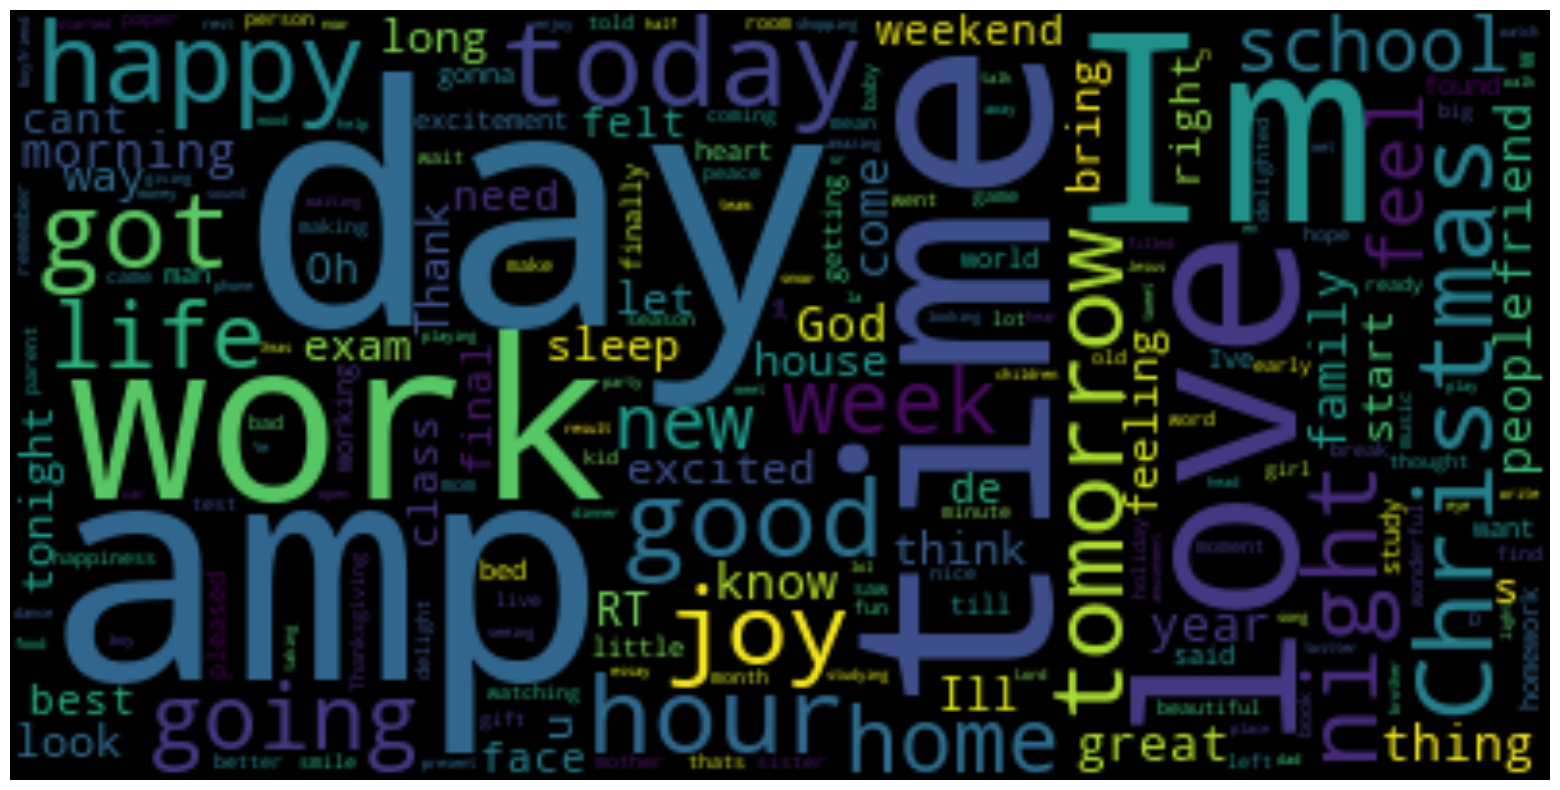

In [175]:
plot_wordcloud(joy_docx)

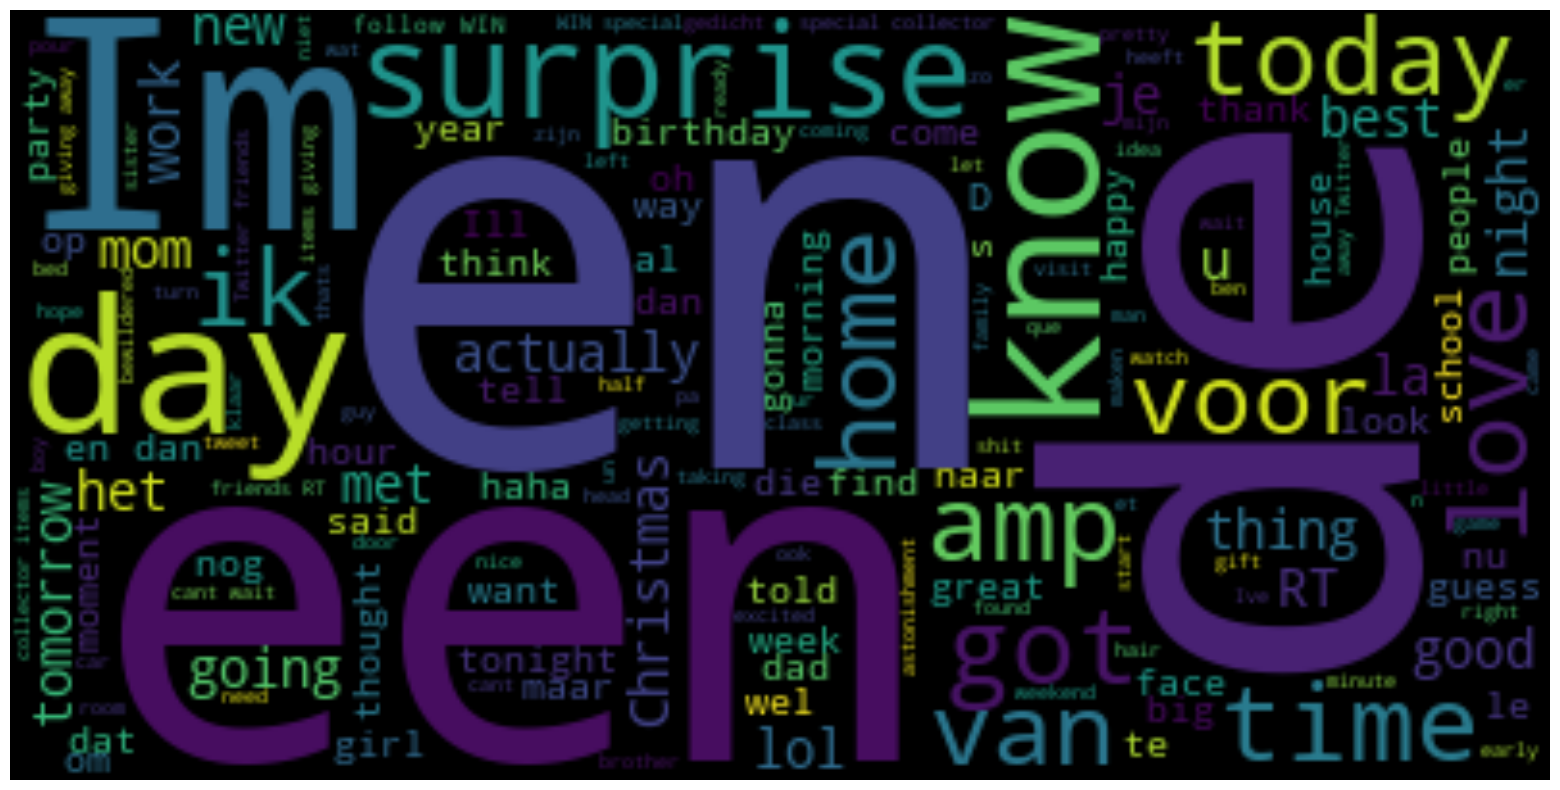

In [176]:
plot_wordcloud(surprise_doc)

### Machine Learning
+ Naive Bayes
+ LogisticRegression
+ DecisionTree

In [177]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [178]:
# Split Our Dataset
from sklearn.model_selection import train_test_split

### Build Features From Our Text

In [179]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [180]:
Xfeatures


0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [181]:
ylabels

0         neutral
1             joy
2         sadness
3             joy
4             joy
           ...   
34787    surprise
34788         joy
34789       anger
34790        fear
34791     sadness
Name: Emotion, Length: 34792, dtype: object

In [182]:
replacement_dict = {
    'neutral': 1,
    'joy': 2,
    'sadness': 3,
    'fear': 4,
    'anger': 5,
    'surprise': 6,
    'disgust': 7,
    'shame': 8,
    
}


# Replace values in the Series using the dictionary
ylabels = ylabels.replace(replacement_dict)
ylabels

0        1
1        2
2        3
3        2
4        2
        ..
34787    6
34788    2
34789    5
34790    4
34791    3
Name: Emotion, Length: 34792, dtype: int64

In [183]:
ylabels.value_counts()

2    11045
3     6722
4     5410
5     4297
6     4062
1     2254
7      856
8      146
Name: Emotion, dtype: int64

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a list of text data in Xfeatures
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)
feature_names = cv.get_feature_names_out()
print(feature_names)


['00' '000' '000ème' ... 'ღƪ' 'ℕoíʀ' 'ㄒʜℰℳℰ']


In [185]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [186]:
#  Split Data
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)


### Build Our Model
+ MultinomialNB


In [187]:
# MultinomialNB
nv_model = MultinomialNB()

In [188]:
nv_model.fit(X_train,y_train)

MultinomialNB()

In [189]:
# Accuracy
# Method 1
nv_model.score(X_train,y_train)

0.7154882154882155

In [190]:
# Prediction
y_pred_for_nv = nv_model.predict(X_test)
y_pred_for_nv

array([4, 3, 3, ..., 3, 5, 3], dtype=int64)

### Make a single Prediction
+ Vectorized our text
+ Applied our model

In [191]:
sample_text = ["Hello how Are you?"]

In [192]:
vect = cv.transform(sample_text).toarray()

In [193]:
nv_model.predict(vect)

array([2], dtype=int64)

In [194]:
# check for the predicion probability / Percentage
nv_model.predict_proba(vect)

array([[6.60238864e-03, 5.47971417e-01, 2.77308453e-01, 3.56458013e-02,
        1.80724955e-02, 1.09737215e-01, 4.63120609e-03, 3.10235989e-05]])

In [195]:
nv_model.classes_

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [196]:
np.max(nv_model.predict_proba(vect))

0.5479714169458723

In [197]:
def predict_emotions(sample_texts, model):
    myvect = cv.transform(sample_texts).toarray()
    predictions = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)

    pred_percentage_for_all = [dict(zip(model.classes_, prob)) for prob in pred_proba]
    for prediction in predictions:
        print(prediction)
        
    print("Prediction: {} , Prediction Score:{}".format(predictions[0], np.max(pred_proba)))
    
    print(pred_percentage_for_all)
 
    return pred_percentage_for_all



In [198]:
predicted_emotions = predict_emotions(sample_text, nv_model)

2
Prediction: 2 , Prediction Score:0.5479714169458723
[{1: 0.0066023886356661385, 2: 0.5479714169458723, 3: 0.27730845271755383, 4: 0.03564580131148017, 5: 0.018072495524791694, 6: 0.10973721517275202, 7: 0.0046312060929311425, 8: 3.1023598949534356e-05}]


In [199]:
predict_emotions(["Hello how Are you?"],nv_model)

2
Prediction: 2 , Prediction Score:0.5479714169458723
[{1: 0.0066023886356661385, 2: 0.5479714169458723, 3: 0.27730845271755383, 4: 0.03564580131148017, 5: 0.018072495524791694, 6: 0.10973721517275202, 7: 0.0046312060929311425, 8: 3.1023598949534356e-05}]


[{1: 0.0066023886356661385,
  2: 0.5479714169458723,
  3: 0.27730845271755383,
  4: 0.03564580131148017,
  5: 0.018072495524791694,
  6: 0.10973721517275202,
  7: 0.0046312060929311425,
  8: 3.1023598949534356e-05}]

### Model Evaluaion


In [200]:
# CLassification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

           1       0.30      0.02      0.04       675
           2       0.51      0.86      0.64      3311
           3       0.56      0.54      0.55      2015
           4       0.75      0.60      0.67      1645
           5       0.64      0.49      0.56      1283
           6       0.61      0.27      0.38      1181
           7       0.53      0.03      0.06       292
           8       1.00      0.03      0.05        36

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [201]:
# Confusion Matrix
confusion = confusion_matrix(y_test,y_pred_for_nv)

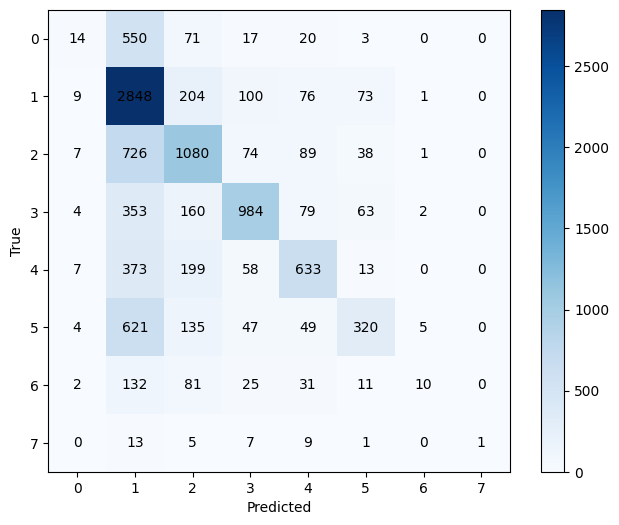

In [202]:
# Heatmap for the confusion matrix
plt.figure(figsize=(8, 6)) 
plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        plt.text(j, i, str(confusion[i][j]), horizontalalignment='center', verticalalignment='center')

plt.show()

## Save Model

In [209]:
import joblib

In [210]:
model_file = open("emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

## Logistic Regression 
+ Accuracy
+ Predict


In [203]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Python3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
# Accuracy
lr_model.score(X_test,y_test)

0.622341444721211

In [206]:
# Predict
from imblearn.over_sampling import SMOTE

predict_emotions(sample_text,lr_model)

1
Prediction: 1 , Prediction Score:0.34925528942341655
[{1: 0.34925528942341655, 2: 0.0979268162462846, 3: 0.127091048212782, 4: 0.06162614940467425, 5: 0.037748439908550285, 6: 0.2619184589018437, 7: 0.062067565816526366, 8: 0.002366232085922319}]


[{1: 0.34925528942341655,
  2: 0.0979268162462846,
  3: 0.127091048212782,
  4: 0.06162614940467425,
  5: 0.037748439908550285,
  6: 0.2619184589018437,
  7: 0.062067565816526366,
  8: 0.002366232085922319}]

In [211]:

from imblearn.over_sampling import SMOTE
# Apply SMOTE
sampling_strategy = {1: 11045, 2: 11045,3: 11045, 4: 11045,5: 11045, 6: 11045, 7: 11045,8: 11045} 

oversampler = SMOTE(sampling_strategy=sampling_strategy)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

print("Resampled class distribution:", Counter(y_resampled))
y_resampled.value_counts()

Resampled class distribution: Counter({2: 11045, 5: 11045, 6: 11045, 4: 11045, 3: 11045, 7: 11045, 1: 11045, 8: 11045})


2    11045
5    11045
6    11045
4    11045
3    11045
7    11045
1    11045
8    11045
Name: Emotion, dtype: int64

In [212]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_resampled, y_resampled)
# Accuracy
lr_model.score(X_test,y_test)

C:\Python3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5758766047135466